In [1]:
import os
from PIL import Image
import random
import numpy as np
import cv2
from io import BytesIO

In [18]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets, transforms
import os
import matplotlib.pyplot as plt
import torchvision
from torchvision.datasets import ImageFolder

def load_images(image_dir, img_width, img_height):
    # Define transformations for the dataset
    transform = transforms.Compose([
        transforms.Resize((img_width, img_height)),  # Resize images to img_width x img_height
        transforms.ToTensor(),])  # Convert images to PyTorch tensors


    # Create an instance of ImageFolder pointing to the root directory
    dataset = ImageFolder(root=image_dir, transform=transform)

    # Print the classes found in the dataset
    print("Classes found:", dataset.classes)

    # Print the number of classes
    print("Number of classes:", len(dataset.classes))

    # Print the size of the dataset
    print("Dataset size:", len(dataset))

    return dataset

# Example usage:
image_dir = '/kaggle/input/stanford-dogs-dataset/images/Images'
img_width = 224
img_height = 224

# Load images using the function
dataset = load_images(image_dir, img_width, img_height)

Classes found: ['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02086079-Pekinese', 'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound', 'n02088238-basset', 'n02088364-beagle', 'n02088466-bloodhound', 'n02088632-bluetick', 'n02089078-black-and-tan_coonhound', 'n02089867-Walker_hound', 'n02089973-English_foxhound', 'n02090379-redbone', 'n02090622-borzoi', 'n02090721-Irish_wolfhound', 'n02091032-Italian_greyhound', 'n02091134-whippet', 'n02091244-Ibizan_hound', 'n02091467-Norwegian_elkhound', 'n02091635-otterhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02092339-Weimaraner', 'n02093256-Staffordshire_bullterrier', 'n02093428-American_Staffordshire_terrier', 'n02093647-Bedlington_terrier', 'n02093754-Border_terrier', 'n02093859-Kerry_blue_terrier', 'n02093991-Irish_terrier', 'n02094114-Norfolk_terrier', 'n02094258-Norwich_terrier', 'n02094

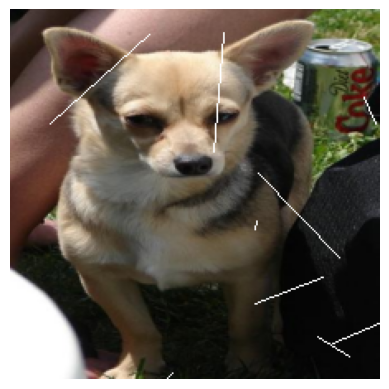

In [57]:
import numpy as np
import torch
import matplotlib.pyplot as plt

def add_scratches(image, num_scratches=10, scratch_length=(5, 90)):
    """Add scratches directly to the image."""
    img_draw = ImageDraw.Draw(image)
    width, height = image.size
    
    for _ in range(num_scratches):
        # Generate random coordinates for the scratches
        x1, y1 = np.random.randint(0, width), np.random.randint(0, height)
        angle = np.random.uniform(0, 2*np.pi)
        length = np.random.randint(*scratch_length)
        x2 = int(x1 + length * np.cos(angle))
        y2 = int(y1 + length * np.sin(angle))
        
        # Draw a scratch line on the image
        color = (255, 255, 255)  # Scratch color (white)
        img_draw.line([(x1, y1), (x2, y2)], fill=color, width=1)
    
    return image

# Assuming img is your original PyTorch tensor image
# Convert it to a PIL image first
img_pil = transforms.ToPILImage()(img)

# Apply scratches to the image
img_with_scratches = add_scratches(img_pil)

# Display the image with scratches
plt.imshow(img_with_scratches)
plt.axis('off')
plt.show()

In [51]:
def apply_noise(image, noise_level=0.1):
    """Apply random noise to the image."""
    img_np = np.array(image)
    noise = np.random.normal(scale=noise_level, size=img_np.shape).astype(np.uint8)
    noisy_img = np.clip(img_np + noise, 0, 255).astype(np.uint8)
    return Image.fromarray(noisy_img)

def apply_color_fading(image, fading_factor=0.8):
    """Apply color fading effect to the image."""
    enhancer = ImageEnhance.Color(image)
    faded_img = enhancer.enhance(fading_factor)
    return faded_img

def apply_vignetting(image, vignetting_factor=0.3, corner_size=0.2):
    """Apply vignetting effect to the image."""
    width, height = image.size
    mask = Image.new('L', (width, height), 255)  # Initialize mask with white (255)
    draw = ImageDraw.Draw(mask)

    # Calculate the size of the faded corners
    corner_width = int(width * corner_size)
    corner_height = int(height * corner_size)

    # Draw black rectangles in the corners to remove them
    draw.rectangle((0, 0, corner_width, corner_height), fill=0)
    draw.rectangle((width - corner_width, 0, width, corner_height), fill=0)
    draw.rectangle((0, height - corner_height, corner_width, height), fill=0)
    draw.rectangle((width - corner_width, height - corner_height, width, height), fill=0)

    # Apply Gaussian blur to the mask
    blurred_mask = mask.filter(ImageFilter.GaussianBlur(width * vignetting_factor / 3))

    # Create a transparent image with RGBA mode
    vignette = Image.new('RGBA', (width, height), (0, 0, 0, 0))

    # Paste the original image onto the transparent image using the blurred mask
    vignette.paste(image, (0, 0), mask=blurred_mask)

    return vignette

def apply_old_photo_effect(image):
    """Apply old, spoiled photo effect to the image."""
    # Add scratches
    image_with_scratches = add_scratches(image)
    # Apply noise
    noisy_image = apply_noise(image_with_scratches)
    # Apply color fading
    faded_image = apply_color_fading(noisy_image)
    # Apply vignetting
    vignette_image = apply_vignetting(faded_image)
    return vignette_image

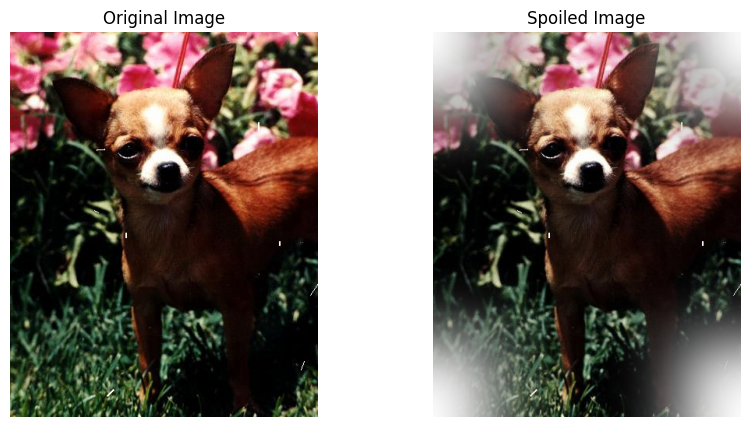

In [52]:
from PIL import Image, ImageFilter, ImageEnhance

# Example usage:
# Load the original image
img_path = "/kaggle/input/stanford-dogs-dataset/images/Images/n02085620-Chihuahua/n02085620_10131.jpg"
original_image = Image.open(img_path)

# Apply old photo effect
spoiled_image = apply_old_photo_effect(original_image)

# Display the original and spoiled images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(spoiled_image)
plt.title("Spoiled Image")
plt.axis('off')

plt.show()